In [1]:
import pandas as pd
import numpy as np
import re
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('datos/volunteers_1v.csv')
df.head(5)

C:\Users\smico\AppData\Local\Temp\ipykernel_8696\3953217336.py:1: DtypeWarning: Columns (4,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos/volunteers_1v.csv')


,Course,Anglo Status,Date Modified,Age,Birth Date,Veteran,Gender,Nationality,Request Status,Date Modified.1,Arrival Medium,Arrival Company,Arrival Number,Identificador,Travel_Alone
0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20.0,NaN,Yes,Male,IRELAND,Cleared,27/02/2019 14:35,NaN,NaN,NaN,1,No
1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21.0,NaN,Yes,Female,UNITED KINGDOM,Cleared,20/03/2019 12:47,NaN,NaN,NaN,2,Yes
2,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,12/05/2021 12:02,20.0,NaN,Yes,Female,CANADA,Veteran,22/05/2019 18:18,NaN,NaN,NaN,3,Yes
3,Zujar TEENS - 2 weeks - July/2/2017 to July/15...,Approved,09/03/2022 12:19,21.0,NaN,Yes,Female,IRELAND,Cleared,11/05/2017 14:43,NaN,NaN,NaN,4,No
4,Zujar TEENS - 2 weeks - July/2/2017 to July/15...,Approved,22/06/2021 23:03,23.0,NaN,Yes,Female,USA,Cleared,24/04/2017 14:05,NaN,NaN,NaN,5,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91108 entries, 0 to 91107
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Course           91108 non-null  object 
 1   Anglo Status     90364 non-null  object 
 2   Date Modified    90366 non-null  object 
 3   Age              90366 non-null  float64
 4   Birth Date       742 non-null    object 
 5   Veteran          86612 non-null  object 
 6   Gender           91108 non-null  object 
 7   Nationality      91108 non-null  object 
 8   Request Status   90366 non-null  object 
 9   Date Modified.1  90366 non-null  object 
 10  Arrival Medium   181 non-null    object 
 11  Arrival Company  180 non-null    object 
 12  Arrival Number   113 non-null    object 
 13  Identificador    91108 non-null  int64  
 14  Travel_Alone     91108 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 10.4+ MB


In [4]:
print(df.columns)

Index(['Course', 'Anglo Status', 'Date Modified', 'Age', 'Birth Date',
       'Veteran', 'Gender', 'Nationality ', 'Request Status',
       'Date Modified.1', 'Arrival Medium', 'Arrival Company',
       'Arrival Number', 'Identificador', 'Travel_Alone'],
      dtype='object')


In [5]:
# Reemplaza los espacios por subrayados en los nombres de las columnas
df.columns= df.columns.str.lstrip()
df.columns= df.columns.str.rstrip()
df.columns = df.columns.str.replace(" ", "_")
df.head(2)

,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone
0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20.0,NaN,Yes,Male,IRELAND,Cleared,27/02/2019 14:35,NaN,NaN,NaN,1,No
1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21.0,NaN,Yes,Female,UNITED KINGDOM,Cleared,20/03/2019 12:47,NaN,NaN,NaN,2,Yes


In [6]:
from datetime import datetime, date

for i, elemento in df['Birth_Date'].iteritems():
    # Comprobar si el elemento es nulo
    if not pd.isnull(elemento):
        # Convertir el elemento en un objeto de tipo fecha
        Birth_Date = datetime.strptime(elemento, "%d/%m/%Y").date()
        # Calcular la diferencia entre la fecha actual y la fecha de nacimiento
        age = date.today() - Birth_Date
        # Convertir la diferencia en años
        age_years = age.days / 365.2425
        # Asignar la edad a la columna "Age"
        df.loc[i, "Age"] = int(age_years)



C:\Users\smico\AppData\Local\Temp\ipykernel_8696\3568555434.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, elemento in df['Birth_Date'].iteritems():


In [7]:
# Iterar sobre cada elemento de la columna "Age"
for i, elemento in df['Age'].iteritems():
    # Comprobar si el elemento es nulo
    if not pd.isnull(elemento):
        # Calcular el año de nacimiento restando la edad actual a la fecha actual
        birthyear = date.today().year - elemento
        # Asignar el año de nacimiento a la columna "Birthyear"
        df.loc[i, "Birth_Date"] = birthyear

C:\Users\smico\AppData\Local\Temp\ipykernel_8696\4091133038.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, elemento in df['Age'].iteritems():


In [8]:
counts = df['Identificador'].value_counts()

# Iterar sobre cada elemento de la columna "Identificador"
for i, elemento in df['Identificador'].iteritems():
    # Comprobar si el elemento en la columna "Veteran" es nulo
    if pd.isnull(df.loc[i, 'Veteran']):
        # Comprobar si el elemento aparece más de una vez
        if counts[elemento] > 1:
            # Asignar 'Yes' a la columna "Veteran"
            df.loc[i, 'Veteran'] = 'Yes'
        else:
            # Asignar 'No' a la columna "Veteran"
            df.loc[i, 'Veteran'] = 'No'

df



C:\Users\smico\AppData\Local\Temp\ipykernel_8696\3584593338.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, elemento in df['Identificador'].iteritems():


,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone
0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20.0,2003.0,Yes,Male,IRELAND,Cleared,27/02/2019 14:35,NaN,NaN,NaN,1,No
1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21.0,2002.0,Yes,Female,UNITED KINGDOM,Cleared,20/03/2019 12:47,NaN,NaN,NaN,2,Yes
2,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,12/05/2021 12:02,20.0,2003.0,Yes,Female,CANADA,Veteran,22/05/2019 18:18,NaN,NaN,NaN,3,Yes
3,Zujar TEENS - 2 weeks - July/2/2017 to July/15...,Approved,09/03/2022 12:19,21.0,2002.0,Yes,Female,IRELAND,Cleared,11/05/2017 14:43,NaN,NaN,NaN,4,No
4,Zujar TEENS - 2 weeks - July/2/2017 to July/15...,Approved,22/06/2021 23:03,23.0,2000.0,Yes,Female,USA,Cleared,24/04/2017 14:05,NaN,NaN,NaN,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91103,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...,NaN,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,Plane,American Airlines,AA36,31574,Yes
91104,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/09/2...,NaN,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,NaN,NaN,NaN,31574,Yes
91105,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/16/2...,NaN,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,NaN,NaN,NaN,31574,Yes
91106,Valverde TEENS-VOLUNTEER 1 WEEK from 06/25/202...,NaN,NaN,18.0,2005.0,No,Female,USA,NaN,NaN,NaN,NaN,NaN,31575,Yes


In [9]:
df["Anglo_Status"].fillna("Pending", inplace=True)
df["Arrival_Medium"].fillna("TBC", inplace=True)
df["Arrival_Company"].fillna("TBC", inplace=True)
df["Arrival_Number"].fillna("TBC", inplace=True)

In [10]:
df['Year'] = df['Course'].str.extract(r'(\d{4})')
df


,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone,Year
0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20.0,2003.0,Yes,Male,IRELAND,Cleared,27/02/2019 14:35,TBC,TBC,TBC,1,No,2019
1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21.0,2002.0,Yes,Female,UNITED KINGDOM,Cleared,20/03/2019 12:47,TBC,TBC,TBC,2,Yes,2019
2,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,12/05/2021 12:02,20.0,2003.0,Yes,Female,CANADA,Veteran,22/05/2019 18:18,TBC,TBC,TBC,3,Yes,2019
3,Zujar TEENS - 2 weeks - July/2/2017 to July/15...,Approved,09/03/2022 12:19,21.0,2002.0,Yes,Female,IRELAND,Cleared,11/05/2017 14:43,TBC,TBC,TBC,4,No,2017
4,Zujar TEENS - 2 weeks - July/2/2017 to July/15...,Approved,22/06/2021 23:03,23.0,2000.0,Yes,Female,USA,Cleared,24/04/2017 14:05,TBC,TBC,TBC,5,Yes,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91103,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,Plane,American Airlines,AA36,31574,Yes,2021
91104,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/09/2...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,TBC,TBC,TBC,31574,Yes,2021
91105,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/16/2...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,TBC,TBC,TBC,31574,Yes,2021
91106,Valverde TEENS-VOLUNTEER 1 WEEK from 06/25/202...,Pending,NaN,18.0,2005.0,No,Female,USA,NaN,NaN,TBC,TBC,TBC,31575,Yes,2021


In [11]:
print(df.isnull().sum())

Course                0
Anglo_Status          0
Date_Modified       742
Age                   0
Birth_Date            0
Veteran               0
Gender                0
Nationality           0
Request_Status      742
Date_Modified.1     742
Arrival_Medium        0
Arrival_Company       0
Arrival_Number        0
Identificador         0
Travel_Alone          0
Year               2748
dtype: int64


In [12]:
df_nulos_año=df[df['Year'].isnull() == True]
df_nulos_año

,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone,Year
220,Villa Engracia - VALENCIA TEACHERS - August 23...,Approved,12/08/2019 14:00,57.0,1966.0,Yes,Male,USA,Cleared,19/07/2019 14:19,TBC,TBC,TBC,183,Yes,NaN
221,Villa Engracia - VALENCIA TEACHERS - August 23...,TMM,11/07/2019 10:36,31.0,1992.0,No,Male,ITALY,Cleared,11/07/2019 10:36,TBC,TBC,TBC,184,Yes,NaN
222,Villa Engracia - VALENCIA TEACHERS - August 23...,No Response,02/09/2019 12:44,33.0,1990.0,Yes,Female,USA,Veteran,12/08/2019 14:05,TBC,TBC,TBC,185,Yes,NaN
223,Villa Engracia - VALENCIA TEACHERS - August 23...,Approved,28/07/2022 16:20,39.0,1984.0,Yes,Female,USA,Cancelled,21/08/2019 16:00,TBC,TBC,TBC,186,Yes,NaN
224,Villa Engracia - VALENCIA TEACHERS - August 23...,Approved,03/06/2019 13:03,25.0,1998.0,No,Female,USA,Program Full,22/08/2019 10:42,TBC,TBC,TBC,187,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90361,*CANDELEDA BALEARES 04/11 TO 11/11,Approved,03/10/2011 17:03,41.0,1982.0,Yes,Female,UNITED KINGDOM,Veteran,17/10/2011 14:35,TBC,TBC,TBC,18434,Yes,NaN
90362,*CANDELEDA BALEARES 04/11 TO 11/11,Approved,26/02/2013 11:01,65.0,1958.0,Yes,Male,UNITED KINGDOM,Veteran,17/10/2011 14:35,TBC,TBC,TBC,11409,Yes,NaN
90363,*CANDELEDA BALEARES 04/11 TO 11/11,Approved,19/03/2018 10:36,66.0,1957.0,Yes,Female,USA,Veteran,17/10/2011 14:35,TBC,TBC,TBC,9909,Yes,NaN
90364,*CANDELEDA BALEARES 04/11 TO 11/11,New,22/07/2011 12:59,76.0,1947.0,Yes,Male,USA,Rejected by Anglo - Date not Suitable,10/10/2011 11:18,TBC,TBC,TBC,30817,Yes,NaN


In [13]:
len(df_nulos_año['Course'].unique())

79

In [14]:
import warnings
warnings.filterwarnings("ignore")
df_nulos_año['Year'] = df_nulos_año['Date_Modified.1'].str.extract(r'(\d{4})')
df_nulos_año

,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone,Year
220,Villa Engracia - VALENCIA TEACHERS - August 23...,Approved,12/08/2019 14:00,57.0,1966.0,Yes,Male,USA,Cleared,19/07/2019 14:19,TBC,TBC,TBC,183,Yes,2019
221,Villa Engracia - VALENCIA TEACHERS - August 23...,TMM,11/07/2019 10:36,31.0,1992.0,No,Male,ITALY,Cleared,11/07/2019 10:36,TBC,TBC,TBC,184,Yes,2019
222,Villa Engracia - VALENCIA TEACHERS - August 23...,No Response,02/09/2019 12:44,33.0,1990.0,Yes,Female,USA,Veteran,12/08/2019 14:05,TBC,TBC,TBC,185,Yes,2019
223,Villa Engracia - VALENCIA TEACHERS - August 23...,Approved,28/07/2022 16:20,39.0,1984.0,Yes,Female,USA,Cancelled,21/08/2019 16:00,TBC,TBC,TBC,186,Yes,2019
224,Villa Engracia - VALENCIA TEACHERS - August 23...,Approved,03/06/2019 13:03,25.0,1998.0,No,Female,USA,Program Full,22/08/2019 10:42,TBC,TBC,TBC,187,No,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90361,*CANDELEDA BALEARES 04/11 TO 11/11,Approved,03/10/2011 17:03,41.0,1982.0,Yes,Female,UNITED KINGDOM,Veteran,17/10/2011 14:35,TBC,TBC,TBC,18434,Yes,2011
90362,*CANDELEDA BALEARES 04/11 TO 11/11,Approved,26/02/2013 11:01,65.0,1958.0,Yes,Male,UNITED KINGDOM,Veteran,17/10/2011 14:35,TBC,TBC,TBC,11409,Yes,2011
90363,*CANDELEDA BALEARES 04/11 TO 11/11,Approved,19/03/2018 10:36,66.0,1957.0,Yes,Female,USA,Veteran,17/10/2011 14:35,TBC,TBC,TBC,9909,Yes,2011
90364,*CANDELEDA BALEARES 04/11 TO 11/11,New,22/07/2011 12:59,76.0,1947.0,Yes,Male,USA,Rejected by Anglo - Date not Suitable,10/10/2011 11:18,TBC,TBC,TBC,30817,Yes,2011


In [15]:
df = df.dropna(subset=["Year"])
df.head(2)

,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone,Year
0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20.0,2003.0,Yes,Male,IRELAND,Cleared,27/02/2019 14:35,TBC,TBC,TBC,1,No,2019
1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21.0,2002.0,Yes,Female,UNITED KINGDOM,Cleared,20/03/2019 12:47,TBC,TBC,TBC,2,Yes,2019


In [16]:
df = pd.concat([df, df_nulos_año], axis=0)
df.head(2)

,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone,Year
0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20.0,2003.0,Yes,Male,IRELAND,Cleared,27/02/2019 14:35,TBC,TBC,TBC,1,No,2019
1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21.0,2002.0,Yes,Female,UNITED KINGDOM,Cleared,20/03/2019 12:47,TBC,TBC,TBC,2,Yes,2019


In [17]:
print(df.isnull().sum())

Course               0
Anglo_Status         0
Date_Modified      742
Age                  0
Birth_Date           0
Veteran              0
Gender               0
Nationality          0
Request_Status     742
Date_Modified.1    742
Arrival_Medium       0
Arrival_Company      0
Arrival_Number       0
Identificador        0
Travel_Alone         0
Year                 0
dtype: int64


In [18]:
df_unicos = df.drop_duplicates(subset='Identificador', inplace=False)
df_edad = df_unicos[["Identificador","Age","Nationality","Gender"]]
df_edad

,Identificador,Age,Nationality,Gender
0,1,20.0,IRELAND,Male
1,2,21.0,UNITED KINGDOM,Female
2,3,20.0,CANADA,Female
3,4,21.0,IRELAND,Female
4,5,23.0,USA,Female
...,...,...,...,...
88555,31189,68.0,UNITED KINGDOM,Female
88577,31190,32.0,UNITED KINGDOM,Female
90293,31244,73.0,UNITED KINGDOM,Female
90313,31245,53.0,UNITED KINGDOM,Female


In [19]:
#Hipotesis1: el mayor grupo de voluntarios pertenece al grupo de 41-60
df_edad = df_edad[df_edad['Age'] >= 18]
df_edad['Age']=df_edad['Age'].astype(int)
df_edad['Age'].sort_values()

90511    18
90916    18
90912    18
90435    18
90439    18
         ..
1506     94
43418    94
49362    95
1715     98
52133    99
Name: Age, Length: 31394, dtype: int32

In [20]:
bins = [18, 25, 40, 60, 75, df['Age'].max()]
labels = ['18-25', '26-40', '41-60', '61-75', '76+']
df_edad['Age_Group'] = pd.cut(df_edad['Age'], bins=bins, labels=labels)
df_edad

,Identificador,Age,Nationality,Gender,Age_Group
0,1,20,IRELAND,Male,18-25
1,2,21,UNITED KINGDOM,Female,18-25
2,3,20,CANADA,Female,18-25
3,4,21,IRELAND,Female,18-25
4,5,23,USA,Female,18-25
...,...,...,...,...,...
88555,31189,68,UNITED KINGDOM,Female,61-75
88577,31190,32,UNITED KINGDOM,Female,26-40
90293,31244,73,UNITED KINGDOM,Female,61-75
90313,31245,53,UNITED KINGDOM,Female,41-60


In [21]:
age_groups = df_edad.groupby(['Age_Group','Gender']).size().reset_index(name='Total')
gender_groups=pd.DataFrame(df_edad.groupby(['Gender'])['Identificador'].count()).reset_index()
gender_groups.rename({'Identificador': 'Total'}, axis=1, inplace=True)

gender_groups['Porcentaje']=(gender_groups['Total'] /gender_groups['Total'].sum())
gender_groups["Porcentaje"] = gender_groups["Porcentaje"].apply(lambda x: format(x, '.0%'))

gender_groups


,Gender,Total,Porcentaje
0,Female,20091,64%
1,Male,11303,36%


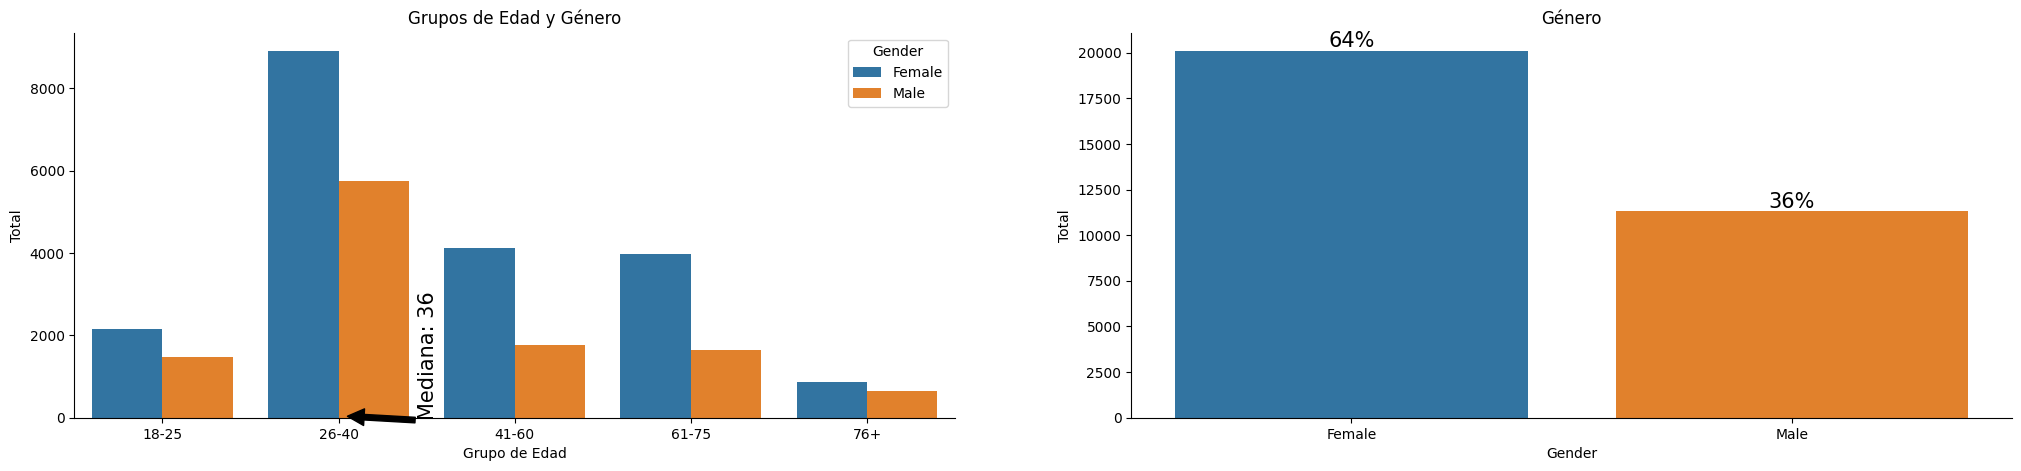

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

age_median = df_edad['Age'].median()

plt.figure(figsize=(25, 5))


plt.subplot(1, 2, 1)

ax = sns.barplot(x='Age_Group', y='Total', hue='Gender', data=age_groups)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Añadir etiquetas y título al gráfico
plt.xlabel('Grupo de Edad')
plt.ylabel('Total')
plt.title('Grupos de Edad y Género')

# Añadir mediana como cuadro de texto en la esquina del gráfico
ax.annotate('Mediana: {:.0f}'.format(age_median), xy=(1.05, age_median), xytext=(1.45, age_median),
             arrowprops=dict(facecolor='black', edgecolor='black', alpha=1), color='Black', fontsize=15,rotation=90)


plt.subplot(1, 2, 2)

ax = sns.barplot(x='Gender', y='Total', data=gender_groups)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Añadir etiquetas y título al gráfico
plt.xlabel('Gender')
plt.ylabel('Total')
plt.title('Género')
for i, bar in enumerate(ax.patches):
   ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height()  +1.5,
        f"{gender_groups['Porcentaje'][i]}",
        horizontalalignment= 'center', verticalalignment='bottom',
        fontsize=15, rotation=0, color='black')

# Mostrar el gráfico
plt.show()

In [23]:
#hipotesis covid
df_años=pd.DataFrame(df_unicos.groupby(['Year'])['Identificador'].count()).reset_index()
df_años.rename({'Identificador': 'Total'}, axis=1, inplace=True)
df_años

,Year,Total
0,2004,11
1,2010,10
2,2011,2425
3,2012,1757
4,2013,2005
5,2014,1717
6,2015,2339
7,2016,2752
8,2017,4497
9,2018,5369


In [24]:
df_años['Year'] = df_años['Year'].astype(int)


In [25]:
bins = [2010, 2019, 2020, df_años['Year'].max()]
labels = ['Pre-Covid (2011-2019)', 'Covid (2020)', 'Post-Covid(2020-2022']
df_años['Covid_Group'] = pd.cut(df_años['Year'], bins=bins, labels=labels)

df_años

,Year,Total,Covid_Group
0,2004,11,NaN
1,2010,10,NaN
2,2011,2425,Pre-Covid (2011-2019)
3,2012,1757,Pre-Covid (2011-2019)
4,2013,2005,Pre-Covid (2011-2019)
5,2014,1717,Pre-Covid (2011-2019)
6,2015,2339,Pre-Covid (2011-2019)
7,2016,2752,Pre-Covid (2011-2019)
8,2017,4497,Pre-Covid (2011-2019)
9,2018,5369,Pre-Covid (2011-2019)


In [26]:
df_años = df_años.dropna(subset=["Covid_Group"])
df_años.drop([14], axis=0, inplace=True)
df_años.reset_index
df_años

,Year,Total,Covid_Group
2,2011,2425,Pre-Covid (2011-2019)
3,2012,1757,Pre-Covid (2011-2019)
4,2013,2005,Pre-Covid (2011-2019)
5,2014,1717,Pre-Covid (2011-2019)
6,2015,2339,Pre-Covid (2011-2019)
7,2016,2752,Pre-Covid (2011-2019)
8,2017,4497,Pre-Covid (2011-2019)
9,2018,5369,Pre-Covid (2011-2019)
10,2019,3718,Pre-Covid (2011-2019)
11,2020,1400,Covid (2020)


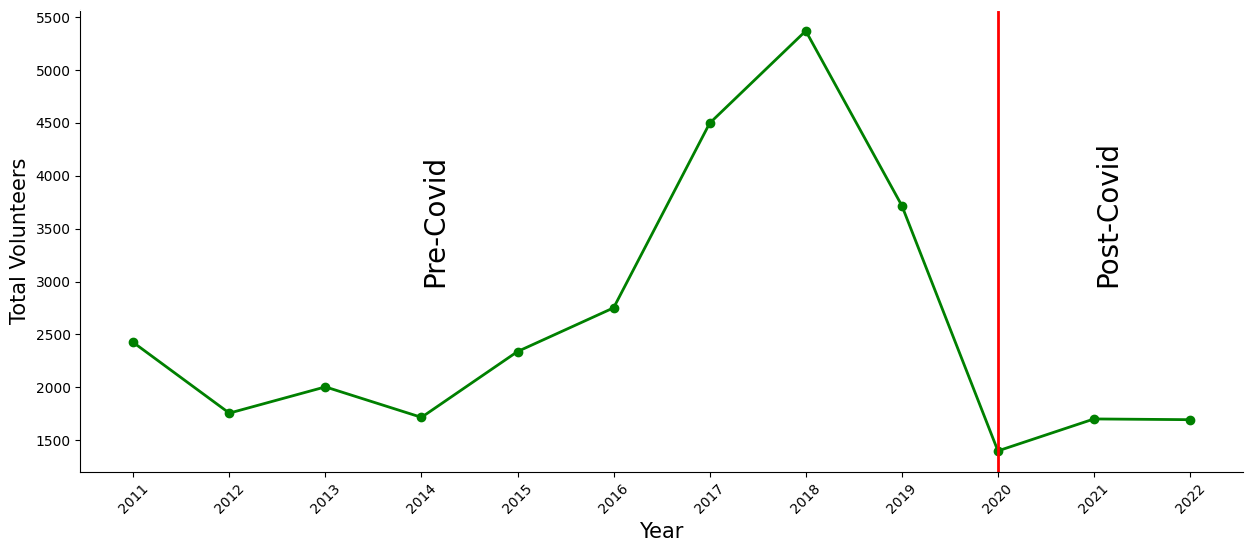

In [27]:
plt.figure(figsize=(15, 6))

ax = plt.axes() 
ax.set_facecolor("white") 

ax.spines['bottom'].set_color('black') 
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white') 
ax.spines['left'].set_color('black') 

plt.plot(df_años["Year"], 
         df_años["Total"], 
         color = "green", 
         linewidth = 2, 
         marker = "o") 

plt.xlabel("Year",fontsize=15) 
plt.ylabel("Total Volunteers",fontsize=15) 
plt.xticks(df_años["Year"],rotation=45)

#NO SOY CAPAZ DE PONER LOS VALORES TOTALES EN CADA PUNTO

# Add the vertical red line at the year 2020
plt.axvline(x=2020, color='red', linewidth=2)

# Add text labels
plt.text(2014, 3002, 'Pre-Covid', rotation=90,  fontsize=20)
plt.text(2021, 3002, 'Post-Covid', rotation=90, fontsize=20)

plt.show()

In [28]:
#Hipotesis2: Más del 50% son americanos

df_nacionalidad = pd.DataFrame(df_unicos.groupby(['Nationality'])
                      ["Identificador"].count()).reset_index()

df_nacionalidad.rename({'Identificador': 'Numero_personas'}, axis=1, inplace=True)

df_nacionalidad['Porcentaje']=(df_nacionalidad['Numero_personas'] /df_nacionalidad['Numero_personas'].sum())*100



df_nacionalidad['Nationality_groups']=np.where(df_nacionalidad['Porcentaje']<2,'OTHERS',df_nacionalidad['Nationality'])
print(df_nacionalidad)

df_nacionalidad_grupos = pd.DataFrame(df_nacionalidad.groupby(['Nationality_groups'])
                      ['Porcentaje','Numero_personas'].sum()).reset_index()

df_nacionalidad_grupos.sort_values(by='Porcentaje',ascending=False)

        Nationality  Numero_personas  Porcentaje Nationality_groups
0         ABU DHABI                3    0.009501             OTHERS
1       AFGHANISTAN               13    0.041172             OTHERS
2           ALBANIA               38    0.120348             OTHERS
3           ALGERIA              323    1.022961             OTHERS
4    AMERICAN SAMOA               50    0.158353             OTHERS
..              ...              ...         ...                ...
183         VIETNAM               22    0.069675             OTHERS
184     WEST INDIES                6    0.019002             OTHERS
185           YEMEN               20    0.063341             OTHERS
186          ZAMBIA               32    0.101346             OTHERS
187        ZIMBABWE               58    0.183690             OTHERS

[188 rows x 4 columns]


,Nationality_groups,Porcentaje,Numero_personas
6,USA,44.110847,13928
4,OTHERS,22.007918,6949
5,UNITED KINGDOM,12.889945,4070
1,CANADA,8.513064,2688
2,INDIA,6.726841,2124
0,AUSTRALIA,3.100554,979
3,IRELAND,2.650831,837


In [29]:
df_nacionalidad_otros=df_nacionalidad[df_nacionalidad['Nationality_groups']=='OTHERS']
df_nacionalidad_otros.sort_values(by='Porcentaje',ascending=False)

,Nationality,Numero_personas,Porcentaje,Nationality_groups
127,NIGERIA,629,1.992082,OTHERS
119,MOROCCO,565,1.789390,OTHERS
153,SOUTH AFRICA,376,1.190816,OTHERS
137,PHILIPPINES,356,1.127474,OTHERS
3,ALGERIA,323,1.022961,OTHERS
...,...,...,...,...
92,IVORY COAST,1,0.003167,OTHERS
6,ANTARCTICA,1,0.003167,OTHERS
151,SLOVENIA,1,0.003167,OTHERS
106,LUXEMBOURG,1,0.003167,OTHERS


In [30]:
df_nacionalidad_otros['Country']=df_nacionalidad_otros['Nationality'].str.title()
df_nacionalidad_otros.head(2)

,Nationality,Numero_personas,Porcentaje,Nationality_groups,Country
0,ABU DHABI,3,0.009501,OTHERS,Abu Dhabi
1,AFGHANISTAN,13,0.041172,OTHERS,Afghanistan


In [31]:
df_paises = pd.read_csv('datos/paises.csv')
df_paises= df_paises.drop(['ISO_Code','M49_Code', 'Region1', 'Region2'], axis=1)
df_paises

,Country,Continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna Islands,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [32]:

df_nacionalidad_otros=df_nacionalidad_otros.merge(df_paises, how='left', on='Country')
df_nacionalidad_otros

,Nationality,Numero_personas,Porcentaje,Nationality_groups,Country,Continent
0,ABU DHABI,3,0.009501,OTHERS,Abu Dhabi,NaN
1,AFGHANISTAN,13,0.041172,OTHERS,Afghanistan,Asia
2,ALBANIA,38,0.120348,OTHERS,Albania,Europe
3,ALGERIA,323,1.022961,OTHERS,Algeria,Africa
4,AMERICAN SAMOA,50,0.158353,OTHERS,American Samoa,Oceania
...,...,...,...,...,...,...
177,VIETNAM,22,0.069675,OTHERS,Vietnam,NaN
178,WEST INDIES,6,0.019002,OTHERS,West Indies,NaN
179,YEMEN,20,0.063341,OTHERS,Yemen,Asia
180,ZAMBIA,32,0.101346,OTHERS,Zambia,Africa


In [33]:
df_nacionalidad_otros= df_nacionalidad_otros.drop(['Nationality_groups'], axis=1)
df_nacionalidad_otros

,Nationality,Numero_personas,Porcentaje,Country,Continent
0,ABU DHABI,3,0.009501,Abu Dhabi,NaN
1,AFGHANISTAN,13,0.041172,Afghanistan,Asia
2,ALBANIA,38,0.120348,Albania,Europe
3,ALGERIA,323,1.022961,Algeria,Africa
4,AMERICAN SAMOA,50,0.158353,American Samoa,Oceania
...,...,...,...,...,...
177,VIETNAM,22,0.069675,Vietnam,NaN
178,WEST INDIES,6,0.019002,West Indies,NaN
179,YEMEN,20,0.063341,Yemen,Asia
180,ZAMBIA,32,0.101346,Zambia,Africa


In [34]:
df_nacionalidad_otros['Continent'].isnull().sum()

42

In [35]:
df_nacionalidad_otros_nulos=df_nacionalidad_otros[df_nacionalidad_otros['Continent'].isnull() == True]
len(df_nacionalidad_otros_nulos['Nationality'])

42

In [36]:
df_nacionalidad_otros_nulos.drop(['Continent'], axis=1, inplace=True)

In [37]:
from fuzzywuzzy import fuzz

# Iterar sobre las filas del dataframe df_nacionalidades
for index, row in df_nacionalidad_otros_nulos.iterrows():
  pais = row['Country']
  max_similarity = 0
  match = None
  
  # Iterar sobre las filas del dataframe df_paises
  for index_df_paises, row_df_paises in df_paises.iterrows():
    country = row_df_paises['Country']
    
    # Calcular el parecido entre las dos cadenas de texto
    similarity = fuzz.token_set_ratio(pais, country)
    
    # Si el parecido es mayor que 50 y mayor que el máximo encontrado hasta ahora, actualizar la variable temporal
    if similarity > 80 and similarity > max_similarity:
      max_similarity = similarity
      match = country
  
  # Si se ha encontrado una coincidencia con parecido mayor que 50, actualizar la columna ciudad_origen en el dataframe df_ciudades
  if match is not None:
    df_nacionalidad_otros_nulos.loc[index, 'Country'] = match

df_nacionalidad_otros_nulos.head(2)

,Nationality,Numero_personas,Porcentaje,Country
0,ABU DHABI,3,0.009501,Abu Dhabi
7,ANTIGUA,3,0.009501,Antigua and Barbuda


In [38]:
df_nacionalidad_otros_nulos=df_nacionalidad_otros_nulos.merge(df_paises, how='left', on='Country')

df_nacionalidad_otros_nulos.head(2)


,Nationality,Numero_personas,Porcentaje,Country,Continent
0,ABU DHABI,3,0.009501,Abu Dhabi,NaN
1,ANTIGUA,3,0.009501,Antigua and Barbuda,North America


In [39]:
df_nacionalidad_otros_nulos['Continent'].isnull().sum()

21

In [40]:
df_nacionalidad_otros_nulos2=df_nacionalidad_otros_nulos[df_nacionalidad_otros_nulos['Continent'].isnull() == True]

df_nacionalidad_otros_nulos2


,Nationality,Numero_personas,Porcentaje,Country,Continent
0,ABU DHABI,3,0.009501,Abu Dhabi,NaN
5,BRITISH WEST INDIES,7,0.022169,British West Indies,NaN
7,CANAL ZONE,1,0.003167,Canal Zone,NaN
8,CAPE VERDI ISLANDS,2,0.006334,Cape Verdi Islands,NaN
9,CHANNEL ISLAND UK,4,0.012668,Channel Island Uk,NaN
13,CZECH REPUBLIC,12,0.038005,Czech Republic,NaN
14,DUBAI,1,0.003167,Dubai,NaN
17,IVORY COAST,1,0.003167,Ivory Coast,NaN
19,"KOREA, SOUTH",19,0.060174,"Korea, South",NaN
22,MOLDOVIA,3,0.009501,Moldovia,NaN


In [41]:
pais=df_nacionalidad_otros_nulos2['Country'].tolist()
pais_equivalencia=['Other','Other','Other', 'Other', 'Other', 'Czechia', 'Other', 'Other', "Democratic People's Republic of Korea", 'Republic of Moldova', 'Other', 'Other', 'Russian Federation', 'Somalia', 'Other', 'Other','Syrian Arab Republic', 'China', 'Other', 'Viet Nam', 'Other']
pais_dict={}

for key,value in zip(pais,pais_equivalencia):
    pais_dict[key]=value

print(pais_dict)

{'Abu Dhabi': 'Other', 'British West Indies': 'Other', 'Canal Zone': 'Other', 'Cape Verdi Islands': 'Other', 'Channel Island Uk': 'Other', 'Czech Republic': 'Czechia', 'Dubai': 'Other', 'Ivory Coast': 'Other', 'Korea, South': "Democratic People's Republic of Korea", 'Moldovia': 'Republic of Moldova', 'Other': 'Other', 'Pacific Island': 'Other', 'Russia': 'Russian Federation', 'Somaliliand': 'Somalia', 'Sw Africa': 'Other', 'Swaziland': 'Other', 'Syria': 'Syrian Arab Republic', 'Taiwan': 'China', 'Us Pacific Island': 'Other', 'Vietnam': 'Viet Nam', 'West Indies': 'Other'}


In [42]:
df_nacionalidad_otros_nulos2=df_nacionalidad_otros_nulos2.replace({'Country':pais_dict})

df_nacionalidad_otros_nulos2

,Nationality,Numero_personas,Porcentaje,Country,Continent
0,ABU DHABI,3,0.009501,Other,NaN
5,BRITISH WEST INDIES,7,0.022169,Other,NaN
7,CANAL ZONE,1,0.003167,Other,NaN
8,CAPE VERDI ISLANDS,2,0.006334,Other,NaN
9,CHANNEL ISLAND UK,4,0.012668,Other,NaN
13,CZECH REPUBLIC,12,0.038005,Czechia,NaN
14,DUBAI,1,0.003167,Other,NaN
17,IVORY COAST,1,0.003167,Other,NaN
19,"KOREA, SOUTH",19,0.060174,Democratic People's Republic of Korea,NaN
22,MOLDOVIA,3,0.009501,Republic of Moldova,NaN


In [43]:
df_nacionalidad_otros_nulos2.drop(['Continent'], axis=1, inplace=True)
df_nacionalidad_otros_nulos2

,Nationality,Numero_personas,Porcentaje,Country
0,ABU DHABI,3,0.009501,Other
5,BRITISH WEST INDIES,7,0.022169,Other
7,CANAL ZONE,1,0.003167,Other
8,CAPE VERDI ISLANDS,2,0.006334,Other
9,CHANNEL ISLAND UK,4,0.012668,Other
13,CZECH REPUBLIC,12,0.038005,Czechia
14,DUBAI,1,0.003167,Other
17,IVORY COAST,1,0.003167,Other
19,"KOREA, SOUTH",19,0.060174,Democratic People's Republic of Korea
22,MOLDOVIA,3,0.009501,Republic of Moldova


In [44]:
df_nacionalidad_otros_nulos2=df_nacionalidad_otros_nulos2.merge(df_paises[['Country','Continent']],how='left', on='Country')

df_nacionalidad_otros_nulos2

,Nationality,Numero_personas,Porcentaje,Country,Continent
0,ABU DHABI,3,0.009501,Other,NaN
1,BRITISH WEST INDIES,7,0.022169,Other,NaN
2,CANAL ZONE,1,0.003167,Other,NaN
3,CAPE VERDI ISLANDS,2,0.006334,Other,NaN
4,CHANNEL ISLAND UK,4,0.012668,Other,NaN
5,CZECH REPUBLIC,12,0.038005,Czechia,Europe
6,DUBAI,1,0.003167,Other,NaN
7,IVORY COAST,1,0.003167,Other,NaN
8,"KOREA, SOUTH",19,0.060174,Democratic People's Republic of Korea,Asia
9,MOLDOVIA,3,0.009501,Republic of Moldova,Europe


In [45]:
df_nacionalidad_otros_nulos2.isnull().sum()

Nationality         0
Numero_personas     0
Porcentaje          0
Country             0
Continent          13
dtype: int64

In [46]:
len(df_nacionalidad_otros['Country'])

182

In [47]:
df_nacionalidad_otros['Continent'].isnull().sum()

42

In [48]:
df_nacionalidad_otros=df_nacionalidad_otros.dropna(subset=['Continent'])
df_nacionalidad_otros_nulos=df_nacionalidad_otros_nulos.dropna(subset=['Continent'])
df_nacionalidad_otros=pd.concat([df_nacionalidad_otros,df_nacionalidad_otros_nulos,df_nacionalidad_otros_nulos2],axis=0)

len(df_nacionalidad_otros['Country'])
df_nacionalidad_otros['Continent'].isnull().sum()

13

In [49]:
df_continente = pd.DataFrame(df_nacionalidad_otros.groupby(['Continent'])
                      ["Numero_personas"].sum()).reset_index()


df_continente['Porcentaje']=(df_continente['Numero_personas'] /df_continente['Numero_personas'].sum())*100


df_continente.sort_values(by='Porcentaje',ascending=False)

,Continent,Numero_personas,Porcentaje
0,Africa,3321,48.418137
2,Asia,1639,23.895612
3,Europe,837,12.202945
4,North America,509,7.420907
5,Oceania,354,5.161102
6,South America,170,2.478495
1,Antarctica,29,0.422802


In [50]:
df_nacionalidad_grupos.sort_values(by=['Porcentaje'])

,Nationality_groups,Porcentaje,Numero_personas
3,IRELAND,2.650831,837
0,AUSTRALIA,3.100554,979
2,INDIA,6.726841,2124
1,CANADA,8.513064,2688
5,UNITED KINGDOM,12.889945,4070
4,OTHERS,22.007918,6949
6,USA,44.110847,13928


Text(0.5, 2.5, 'Distribución por continente del resto')

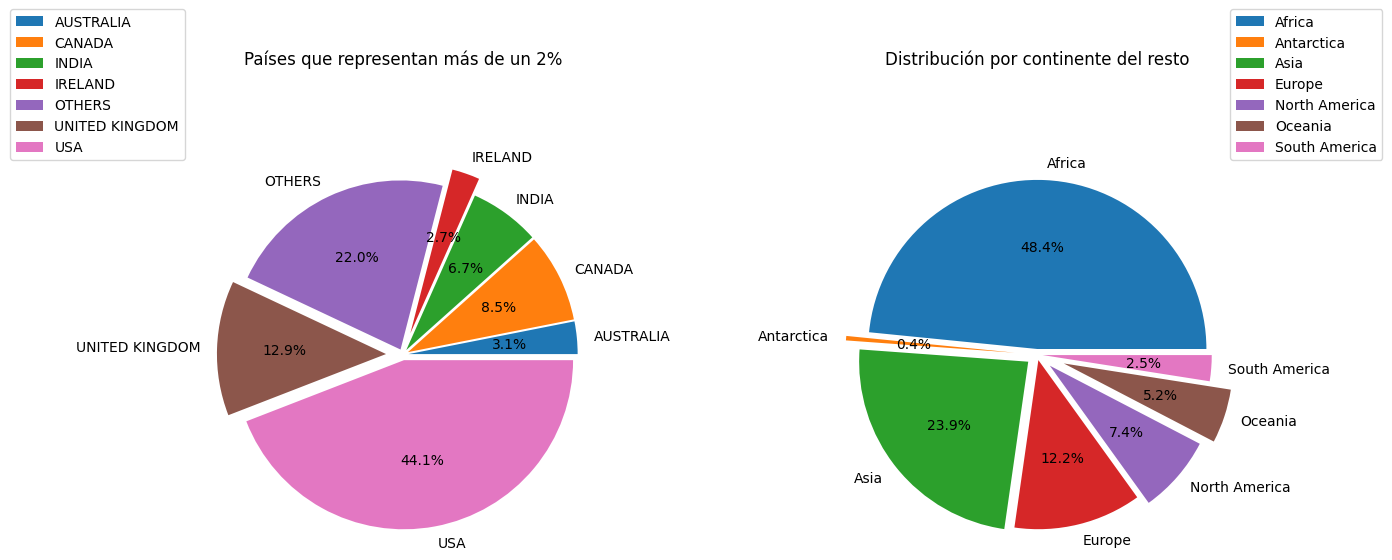

In [51]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=3.5)

explode = (0.1, 0.1, 0.1, 0.4, 0.1, 0.3, 0.1)
explode2=(0.1, 0.4, 0.2, 0.1, 0.3, 0.5, 0.1)

plt.subplot(1, 2, 1)
plt.pie(df_nacionalidad_grupos['Porcentaje'], 
    labels = df_nacionalidad_grupos['Nationality_groups'], 
    autopct = '%1.1f%%', 
    radius=3,
    explode=explode
)
plt.legend(bbox_to_anchor = (-1, 3))
plt.title("Países que representan más de un 2%", y=2.5)

plt.subplot(1, 2, 2)
plt.pie(df_continente['Porcentaje'], 
    labels = df_continente['Continent'], 
    autopct = '%1.1f%%', 
    radius=3,
    explode=explode2
)
plt.legend(bbox_to_anchor = (3, 3))
plt.title("Distribución por continente del resto", y=2.5)


In [52]:
df_veterans=df.groupby(['Identificador'])['Course'].count().reset_index()
print(df_veterans['Course'].sum())

df_veterans.rename({'Course':'Repeat'},axis=1,inplace=True)
df_veterans


91108


,Identificador,Repeat
0,1,7
1,2,14
2,3,5
3,4,6
4,5,25
...,...,...
31570,31571,1
31571,31572,1
31572,31573,2
31573,31574,3


In [53]:
bins = [0, 1, 5, 10, df_veterans['Repeat'].max()]
labels = ['1', '2-5', '6-10', '+10']
df_veterans['Veterans_Group'] = pd.cut(df_veterans['Repeat'], bins=bins, labels=labels)

df_veterans

,Identificador,Repeat,Veterans_Group
0,1,7,6-10
1,2,14,+10
2,3,5,2-5
3,4,6,6-10
4,5,25,+10
...,...,...,...
31570,31571,1,1
31571,31572,1,1
31572,31573,2,2-5
31573,31574,3,2-5


In [54]:
df_veteran_group= df_veterans.groupby(['Veterans_Group']).count().reset_index()
df_veteran_group['Porcentaje']= (df_veteran_group['Repeat']/df_veteran_group['Repeat'].sum())
df_veteran_group["Porcentaje"] = df_veteran_group["Porcentaje"].apply(lambda x: format(x, '.0%'))

df_veteran_group

,Veterans_Group,Identificador,Repeat,Porcentaje
0,1,2785,2785,9%
1,2-5,26114,26114,83%
2,6-10,1868,1868,6%
3,+10,808,808,3%


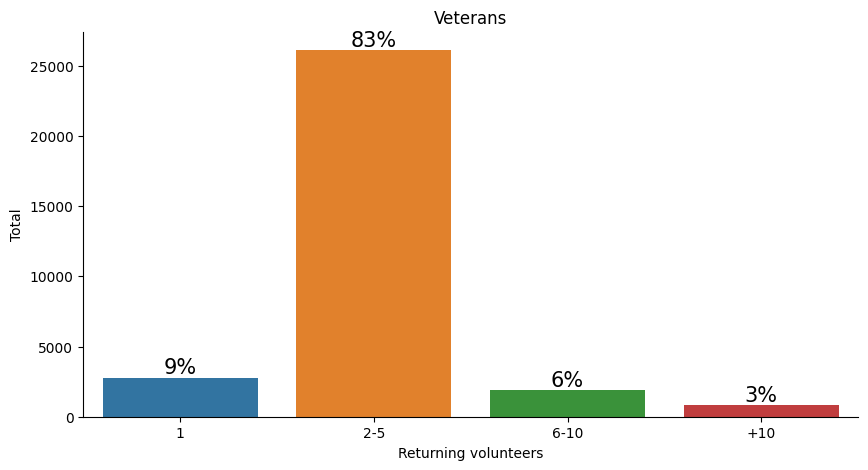

In [55]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(x='Veterans_Group', y='Repeat', data=df_veteran_group)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Añadir etiquetas y título al gráfico
plt.xlabel('Returning volunteers')
plt.ylabel('Total')
plt.title('Veterans')
for i, bar in enumerate(ax.patches):
   ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height()  +1.5,
        f"{df_veteran_group['Porcentaje'][i]}",
        horizontalalignment= 'center', verticalalignment='bottom',
        fontsize=15, rotation=0, color='black')

# Mostrar el gráfico
plt.show()

In [56]:
df.dtypes
df['Year'] = df['Year'].astype(int)

df_2021 = df[df['Year'] == 2021].copy()
df_2021


,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone,Year
554,Valverde TWENTY - 1 WEEK from 07/02/2021 to 07...,No Response,27/04/2021 10:31,22.0,2001.0,No,Female,USA,Cleared,13/07/2021 16:14,TBC,TBC,TBC,404,Yes,2021
555,Valverde TWENTY - 1 WEEK from 07/02/2021 to 07...,Approved,25/03/2021 17:03,20.0,2003.0,Yes,Female,USA,Veteran,31/05/2021 22:21,TBC,TBC,TBC,405,Yes,2021
556,Valverde TWENTY - 1 WEEK from 07/02/2021 to 07...,DYSS,30/03/2021 9:50,64.0,1959.0,No,Female,USA,Cleared,13/07/2021 16:14,TBC,TBC,TBC,406,Yes,2021
557,Valverde TWENTY - 1 WEEK from 07/02/2021 to 07...,Approved,24/06/2021 11:45,21.0,2002.0,No,Male,UNITED KINGDOM,Cleared,13/07/2021 16:14,TBC,TBC,TBC,407,Yes,2021
558,Valverde TWENTY - 1 WEEK from 07/02/2021 to 07...,No Response,26/05/2022 11:05,21.0,2002.0,Yes,Male,UNITED KINGDOM,Cleared,01/06/2021 16:09,TBC,TBC,TBC,136,No,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91104,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/09/2...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,TBC,TBC,TBC,31574,Yes,2021
91105,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/16/2...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,TBC,TBC,TBC,31574,Yes,2021
91106,Valverde TEENS-VOLUNTEER 1 WEEK from 06/25/202...,Pending,NaN,18.0,2005.0,No,Female,USA,NaN,NaN,TBC,TBC,TBC,31575,Yes,2021
91107,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/02/2...,Pending,NaN,18.0,2005.0,No,Female,USA,NaN,NaN,TBC,TBC,TBC,31575,Yes,2021


In [60]:
import re

# Crear una expresión regular para buscar "TEENS" o "TEEN"
pattern = re.compile("TEENS|TEEN", re.IGNORECASE)

# Seleccionar las filas donde la columna "Course" contiene el patrón
df_teens_2021 = df_2021[df_2021['Course'].str.contains(pattern)]
df_teens_2021

,Course,Anglo_Status,Date_Modified,Age,Birth_Date,Veteran,Gender,Nationality,Request_Status,Date_Modified.1,Arrival_Medium,Arrival_Company,Arrival_Number,Identificador,Travel_Alone,Year
668,Valverde TEENS-VOLUNTEER 1 WEEK from 07/09/202...,Approved,04/07/2022 12:57,18.0,2005.0,Yes,Female,FRANCE,Veteran,21/06/2021 17:42,TBC,TBC,TBC,479,No,2021
669,Valverde TEENS-VOLUNTEER 1 WEEK from 07/09/202...,No Response,26/08/2022 16:31,18.0,2005.0,Yes,Male,UNITED KINGDOM,Veteran,23/06/2021 15:38,TBC,TBC,TBC,28,Yes,2021
25757,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...,Approved,05/05/2022 12:42,18.0,2005.0,Yes,Female,IRELAND,Program Full,15/06/2021 17:06,TBC,TBC,TBC,25,No,2021
25758,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...,Not suitable,09/06/2021 9:37,19.0,2004.0,No,Male,INDIA,Cleared,09/06/2021 9:37,TBC,TBC,TBC,436,Yes,2021
25759,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...,No Response,09/05/2022 10:37,19.0,2004.0,No,Male,USA,Cleared,16/08/2021 16:48,TBC,TBC,TBC,501,Yes,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91103,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,Plane,American Airlines,AA36,31574,Yes,2021
91104,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/09/2...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,TBC,TBC,TBC,31574,Yes,2021
91105,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/16/2...,Pending,NaN,17.0,2006.0,Yes,Female,USA,NaN,NaN,TBC,TBC,TBC,31574,Yes,2021
91106,Valverde TEENS-VOLUNTEER 1 WEEK from 06/25/202...,Pending,NaN,18.0,2005.0,No,Female,USA,NaN,NaN,TBC,TBC,TBC,31575,Yes,2021


In [61]:
cursos=df_teens_2021["Course"].unique()

serie_cursos = pd.Series(cursos).reset_index(drop=True)
serie_cursos

0    Valverde TEENS-VOLUNTEER 1 WEEK from 07/09/202...
1    La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...
2    La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/02/...
3    La Alberca TEENS-VOLUNTEER 1 WEEK from 07/16/2...
4    La Alberca TEENS-VOLUNTEER 1 WEEK from 07/09/2...
5    La Alberca TEENS-VOLUNTEER 1 WEEK from 07/02/2...
6                 INTERESTED IN SUMMER TEEN CAMPS 2021
7    Valverde TEENS-VOLUNTEER 1 WEEK from 06/25/202...
dtype: object

In [62]:
serie_cursos.drop([6], axis=0, inplace=True)
serie_cursos

0    Valverde TEENS-VOLUNTEER 1 WEEK from 07/09/202...
1    La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...
2    La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/02/...
3    La Alberca TEENS-VOLUNTEER 1 WEEK from 07/16/2...
4    La Alberca TEENS-VOLUNTEER 1 WEEK from 07/09/2...
5    La Alberca TEENS-VOLUNTEER 1 WEEK from 07/02/2...
7    Valverde TEENS-VOLUNTEER 1 WEEK from 06/25/202...
dtype: object

In [63]:
def dividir_serie(serie):
    # Crear un DataFrame vacío
    df_cursos = pd.DataFrame(columns=['Destino', 'Tipo', 'Duración', 'Comienzo', 'Final', 'Nombre_completo'])
    
    # Recorrer cada elemento de la serie
    for i, elemento in serie_cursos.iteritems():
        # Extraer las partes de la cadena usando expresiones regulares
        match = re.search(r'(.*) (TEENS|ADULTS)-VOLUNTEER (.*) from (.*) to (.*)', elemento)
        destino = match.group(1)
        tipo = match.group(2)
        duracion = match.group(3)
        comienzo = match.group(4)
        final = match.group(5)
        
        # Añadir las partes extraídas y el nombre completo al DataFrame
        df_cursos.loc[i] = [destino, tipo, duracion, comienzo, final, elemento]
    
    return df_cursos

# Aplicar la función a la serie
df_cursos = dividir_serie(serie_cursos)
df_cursos

,Destino,Tipo,Duración,Comienzo,Final,Nombre_completo
0,Valverde,TEENS,1 WEEK,07/09/2021,07/16/2021,Valverde TEENS-VOLUNTEER 1 WEEK from 07/09/202...
1,La Alberca,TEENS,2 WEEKS,07/09/2021,07/23/2021,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/09/...
2,La Alberca,TEENS,2 WEEKS,07/02/2021,07/16/2021,La Alberca TEENS-VOLUNTEER 2 WEEKS from 07/02/...
3,La Alberca,TEENS,1 WEEK,07/16/2021,07/23/2021,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/16/2...
4,La Alberca,TEENS,1 WEEK,07/09/2021,07/16/2021,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/09/2...
5,La Alberca,TEENS,1 WEEK,07/02/2021,07/09/2021,La Alberca TEENS-VOLUNTEER 1 WEEK from 07/02/2...
7,Valverde,TEENS,1 WEEK,06/25/2021,07/02/2021,Valverde TEENS-VOLUNTEER 1 WEEK from 06/25/202...
